# Project Loan Default Prediction

In [118]:
#All Libraries used
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Split dataset 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#depois verificar se usámos tudo


In [119]:
#Import Dataset
#df = pd.read_csv('C:\ML\loan_default_prediction.csv')
df = pd.read_csv('loan_default_prediction.csv')
print(df.columns)
df=df.drop(['ID','GGGrade','Validation','Designation','Debt_to_Income','Postal_Code','Deprecatory_Records',\
            'Inquiries','Gross_Collection','Sub_GGGrade','Total_Unpaid_CL',],axis=1)
print(df.columns)

Index(['ID', 'Asst_Reg', 'GGGrade', 'Experience', 'Validation',
       'Yearly_Income', 'Home_Status', 'Unpaid_2_years', 'Already_Defaulted',
       'Designation', 'Debt_to_Income', 'Postal_Code', 'Lend_Amount',
       'Deprecatory_Records', 'Interest_Charged', 'Usage_Rate', 'Inquiries',
       'Present_Balance', 'Gross_Collection', 'Sub_GGGrade', 'File_Status',
       'State', 'Account_Open', 'Total_Unpaid_CL', 'Duration', 'Unpaid_Amount',
       'Reason', 'Claim_Type', 'Due_Fee', 'Default'],
      dtype='object')
Index(['Asst_Reg', 'Experience', 'Yearly_Income', 'Home_Status',
       'Unpaid_2_years', 'Already_Defaulted', 'Lend_Amount',
       'Interest_Charged', 'Usage_Rate', 'Present_Balance', 'File_Status',
       'State', 'Account_Open', 'Duration', 'Unpaid_Amount', 'Reason',
       'Claim_Type', 'Due_Fee', 'Default'],
      dtype='object')


In [120]:
#Conversão dos anos de experiencia para númerico
df['Experience']=df['Experience'].apply(lambda i: 10 if i[0:1]=='>' else 1 if i[0:1]=='<' else int(i[0:1]))
#Conversão da duração para númerico
df['Duration']=df['Duration'].apply(lambda i : i.replace(' years','')).astype(int)
df.head()
#df['Experience'].describe()

,Asst_Reg,Experience,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,File_Status,State,Account_Open,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,421802,10,633600.00,MORTGAGE,0,0,42023.25,15.39,88.924,607161.90,fully paid,California,17,3,31216.05,debt consolidation,I,0.0,0
1,3964312,7,85483.20,RENT,0,0,38133.00,9.94,102.856,269234.06,whole,NC,15,5,11660.49,debt consolidation,I,0.0,0
2,4247560,1,79200.00,RENT,0,0,17100.00,22.35,60.372,22476.53,whole,Florida,7,5,5637.87,major purchase,I,0.0,0
3,197179,1,61600.00,RENT,0,0,5130.00,10.36,116.272,15242.09,fully paid,NewJersey,9,3,15607.17,major purchase,I,0.0,1
4,4646684,2,68053.92,RENT,0,0,19665.00,13.68,127.280,65433.94,fully paid,LA,10,5,27472.86,debt consolidation,I,0.0,0


In [121]:
#View Instances and Features
df.shape

(87500, 19)

In [122]:
#View info of dataset
display(df.isnull().sum())
df.info()

Asst_Reg                0
Experience              0
Yearly_Income        5575
Home_Status             0
Unpaid_2_years          0
Already_Defaulted       0
Lend_Amount             0
Interest_Charged        0
Usage_Rate              0
Present_Balance         0
File_Status             0
State                   0
Account_Open            0
Duration                0
Unpaid_Amount        4852
Reason                  0
Claim_Type              0
Due_Fee                 0
Default                 0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Asst_Reg           87500 non-null  int64  
 1   Experience         87500 non-null  int64  
 2   Yearly_Income      81925 non-null  float64
 3   Home_Status        87500 non-null  object 
 4   Unpaid_2_years     87500 non-null  int64  
 5   Already_Defaulted  87500 non-null  int64  
 6   Lend_Amount        87500 non-null  float64
 7   Interest_Charged   87500 non-null  float64
 8   Usage_Rate         87500 non-null  float64
 9   Present_Balance    87500 non-null  float64
 10  File_Status        87500 non-null  object 
 11  State              87500 non-null  object 
 12  Account_Open       87500 non-null  int64  
 13  Duration           87500 non-null  int32  
 14  Unpaid_Amount      82648 non-null  float64
 15  Reason             87500 non-null  object 
 16  Claim_Type         875

In [123]:
#drop empty
df=df.dropna()
df.isnull().sum()
df.shape

(77376, 19)

In [125]:
#DATA FRAME COM VARIÁVEIS CONTINUAS
realnum=df[['Asst_Reg','Experience','Yearly_Income','Lend_Amount','Interest_Charged','Usage_Rate','Present_Balance',\
            'Duration','Unpaid_Amount']]
realnum

,Asst_Reg,Experience,Yearly_Income,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,Duration,Unpaid_Amount
0,421802,10,633600.00,42023.25,15.39,88.924,607161.90,3,31216.05
1,3964312,7,85483.20,38133.00,9.94,102.856,269234.06,5,11660.49
2,4247560,1,79200.00,17100.00,22.35,60.372,22476.53,5,5637.87
3,197179,1,61600.00,5130.00,10.36,116.272,15242.09,3,15607.17
4,4646684,2,68053.92,19665.00,13.68,127.280,65433.94,5,27472.86
...,...,...,...,...,...,...,...,...,...
87494,5409793,1,246400.00,20520.00,12.62,87.720,350087.11,3,10383.12
87495,4535984,10,75680.00,10260.00,8.35,51.084,15100.14,3,10012.05
87496,2624710,3,90423.52,27360.00,24.18,129.172,102811.88,5,24921.54
87497,5966919,10,91520.00,8550.00,11.03,83.420,14584.11,3,14517.90


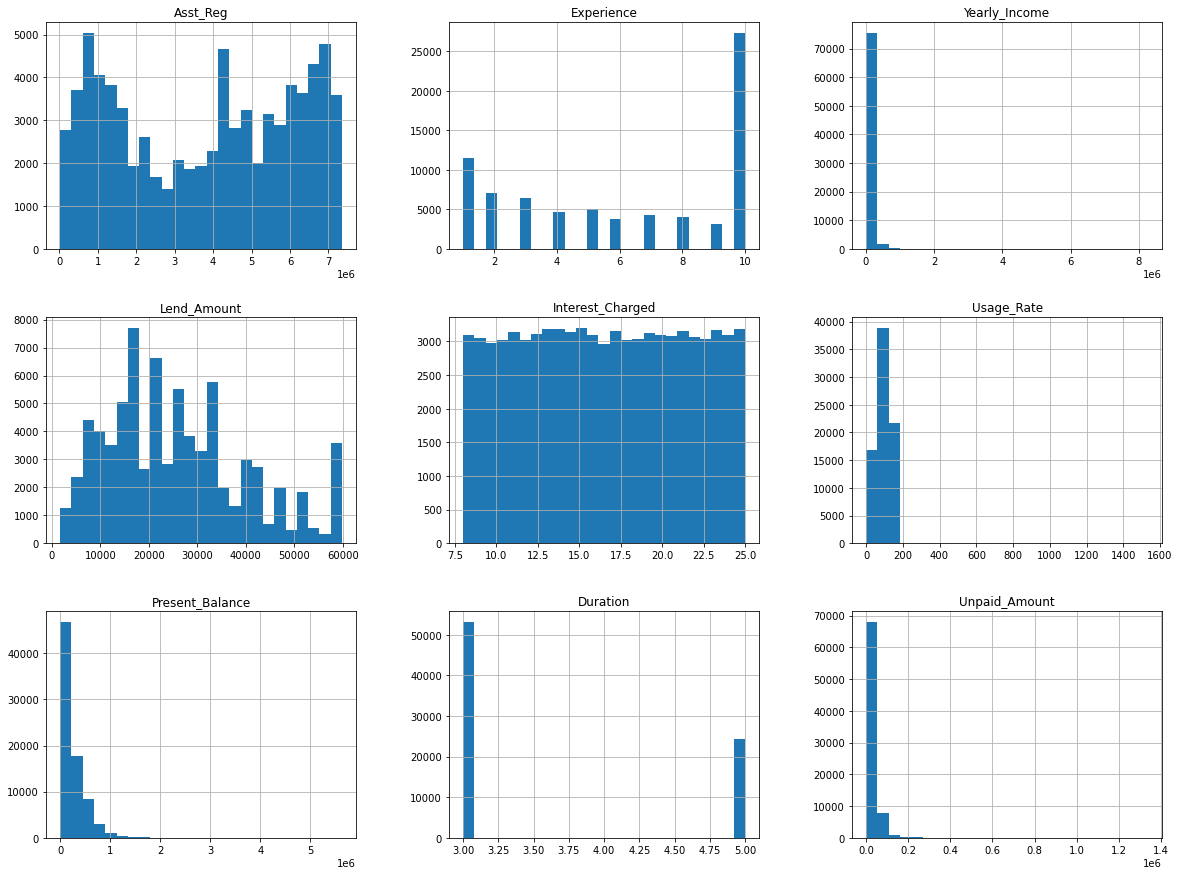

In [126]:
#plots
realnum.hist(bins=25,figsize=(20,15))
plt.show()

In [127]:
realnum.describe()

,Asst_Reg,Experience,Yearly_Income,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,Duration,Unpaid_Amount
count,7.737600e+04,77376.000000,7.737600e+04,77376.000000,77376.000000,77376.000000,7.737600e+04,77376.000000,7.737600e+04
mean,3.801793e+06,6.144360,1.349915e+05,25927.213109,16.518339,95.489869,2.363786e+05,3.627197,2.953228e+04
std,2.289120e+06,3.538256,9.953162e+04,14443.738100,4.905345,40.610291,2.553444e+05,0.927917,3.757589e+04
min,2.484700e+04,1.000000,8.800000e+03,1710.000000,8.000000,0.000000,0.000000e+00,3.000000,0.000000e+00
25%,1.486830e+06,3.000000,8.330256e+04,15048.000000,12.310000,66.048000,5.181092e+04,3.000000,1.144332e+04
50%,4.133126e+06,7.000000,1.144000e+05,23940.000000,16.490000,97.008000,1.386309e+05,3.000000,2.088594e+04
75%,5.956216e+06,10.000000,1.601600e+05,34200.000000,20.772500,126.592000,3.535544e+05,5.000000,3.643497e+04
max,7.351847e+06,10.000000,8.264031e+06,59850.000000,25.000000,1534.756000,5.629234e+06,5.000000,1.338778e+06


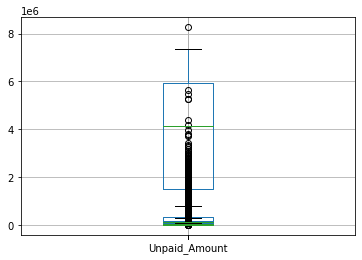

In [103]:
#df.boxplot(by ='day', column =['total_bill'], grid = False)
#realnum.boxplot(figsize=(20,15))
#plt.show()
#DataFrame.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, 
#grid=True, figsize=None, layout=None, return_type=None, backend=None, **kwargs)

for i in realnum.columns: df.boxplot(column = i)

In [128]:
#selecionar só objectos

cat=df[df.columns[df.dtypes!='object']] #só variáveis que são numeros, falta validar se há categóricas

In [68]:
#Get main statistics of numerical features
#df.value_counts()
#VER SE VARIAVEL NUMERICA TEM ALGUM STRING
df['Home_Status'].value_counts()


MORTGAGE    44160
RENT        34914
OWN          8416
OTHER           6
NONE            4
Name: Home_Status, dtype: int64

In [9]:
#drop duplicates
df.drop_duplicates().shape

(87500, 30)

In [11]:
#names features
df.columns

Index(['ID', 'Asst_Reg', 'GGGrade', 'Experience', 'Validation',
       'Yearly_Income', 'Home_Status', 'Unpaid_2_years', 'Already_Defaulted',
       'Designation', 'Debt_to_Income', 'Postal_Code', 'Lend_Amount',
       'Deprecatory_Records', 'Interest_Charged', 'Usage_Rate', 'Inquiries',
       'Present_Balance', 'Gross_Collection', 'Sub_GGGrade', 'File_Status',
       'State', 'Account_Open', 'Total_Unpaid_CL', 'Duration', 'Unpaid_Amount',
       'Reason', 'Claim_Type', 'Due_Fee', 'Default'],
      dtype='object')

In [129]:
#ver nulos e na
print(df.isna().sum(axis=0))
df.isnull().sum(axis=0)/df.shape[0]*100 #converter para %, fazer round

Asst_Reg             0
Experience           0
Yearly_Income        0
Home_Status          0
Unpaid_2_years       0
Already_Defaulted    0
Lend_Amount          0
Interest_Charged     0
Usage_Rate           0
Present_Balance      0
File_Status          0
State                0
Account_Open         0
Duration             0
Unpaid_Amount        0
Reason               0
Claim_Type           0
Due_Fee              0
Default              0
dtype: int64


Asst_Reg             0.0
Experience           0.0
Yearly_Income        0.0
Home_Status          0.0
Unpaid_2_years       0.0
Already_Defaulted    0.0
Lend_Amount          0.0
Interest_Charged     0.0
Usage_Rate           0.0
Present_Balance      0.0
File_Status          0.0
State                0.0
Account_Open         0.0
Duration             0.0
Unpaid_Amount        0.0
Reason               0.0
Claim_Type           0.0
Due_Fee              0.0
Default              0.0
dtype: float64

In [18]:
#se quisermos simplesmente apagar os missing values
#df.drop.na().copy()
#se se quiser apagar a variavel com brancos
#df.drop.na(axis=1).copy()
#para fazer fill dos brancos7na, fazemos pipeline

In [19]:
#ver estatísticas descritivas
df.describe() #ver se fazemos só para as numerica
#VER OUTLIERS
#precisamos de distinguir entre numerical e categorical
#ver se queremos incluir medidas de assimetria e curtose

,ID,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Deprecatory_Records,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Gross_Collection,Sub_GGGrade,Account_Open,Total_Unpaid_CL,Unpaid_Amount,Due_Fee,Default
count,87500.000000,8.750000e+04,8.192500e+04,87500.000000,87500.000000,84011.000000,86111.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,87500.000000,87500.00000,8.331400e+04,8.264800e+04,87500.000000,87500.000000
mean,83946.253509,3.798914e+06,1.348596e+05,0.332937,0.005726,30.942660,51155.385491,25920.535680,0.202400,16.518375,95.517348,0.670640,2.363895e+05,39.461697,22.024891,12.77944,5.326864e+04,2.955649e+04,0.316407,0.188709
std,36100.102950,2.289038e+06,9.882473e+04,0.876080,0.083505,14.079813,31211.229930,14433.837213,0.646414,4.902011,40.554035,0.959572,2.550568e+05,391.919578,6.452697,5.37116,5.325551e+04,3.745625e+04,3.546087,0.391279
min,21560.000000,2.484700e+04,8.800000e+03,0.000000,0.000000,0.000000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.00000,3.320000e+02,0.000000e+00,0.000000,0.000000
25%,52616.750000,1.483874e+06,8.324659e+04,0.000000,0.000000,20.428800,22900.000000,15048.000000,0.000000,12.310000,66.048000,0.000000,5.173493e+04,0.000000,17.000000,9.00000,2.324000e+04,1.144674e+04,0.000000,0.000000
50%,83900.000000,4.132010e+06,1.144000e+05,0.000000,0.000000,30.139200,47700.000000,23940.000000,0.000000,16.490000,97.008000,0.000000,1.388062e+05,0.000000,21.000000,12.00000,3.967400e+04,2.089278e+04,0.000000,0.000000
75%,115261.250000,5.952909e+06,1.601600e+05,0.000000,0.000000,40.908000,80200.000000,34200.000000,0.000000,20.770000,126.592000,1.000000,3.534755e+05,0.000000,26.000000,16.00000,6.640000e+04,3.644908e+04,0.000000,0.000000
max,146559.000000,7.351847e+06,8.264031e+06,18.000000,6.000000,639.290400,99900.000000,59850.000000,86.000000,25.000000,1534.756000,8.000000,5.629234e+06,26308.470000,45.000000,83.00000,1.710630e+06,1.338778e+06,169.050000,1.000000


In [130]:
#fazer value_counts() das variáveis que são ordinais e categóricas
df['Default'].value_counts()/df.shape[0] #quantos defaults temos
#print(df[df['Default']==1]['Default'].value_counts())

0    0.810936
1    0.189064
Name: Default, dtype: float64

In [131]:
#ver correlações
df.corr()
#cuidado com a corr nas categoricas!

,Asst_Reg,Experience,Yearly_Income,Unpaid_2_years,Already_Defaulted,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,Account_Open,Duration,Unpaid_Amount,Due_Fee,Default
Asst_Reg,1.000000,-0.011723,0.035239,0.035024,0.009119,0.037186,-0.002571,-0.074240,0.011439,0.055357,0.060966,0.032632,-0.064270,-0.413878
Experience,-0.011723,1.000000,0.065124,0.015887,0.006864,0.092587,-0.001331,0.035039,0.099956,0.030261,0.057528,0.086779,-0.005956,0.002072
Yearly_Income,0.035239,0.065124,1.000000,0.047839,0.015697,0.377743,0.000422,0.046129,0.480897,0.146856,0.060152,0.346428,0.010549,-0.002147
Unpaid_2_years,0.035024,0.015887,0.047839,1.000000,0.139529,-0.013663,0.000443,-0.016255,0.062572,0.045653,-0.006936,-0.035108,0.022799,-0.030099
Already_Defaulted,0.009119,0.006864,0.015697,0.139529,1.000000,0.000499,-0.001045,-0.027518,0.020049,0.015029,0.004988,0.002057,0.009956,-0.007956
Lend_Amount,0.037186,0.092587,0.377743,-0.013663,0.000499,1.000000,-0.002254,0.114093,0.322504,0.179493,0.408658,0.343429,0.036823,-0.059757
Interest_Charged,-0.002571,-0.001331,0.000422,0.000443,-0.001045,-0.002254,1.000000,-0.001309,-0.002172,0.000167,0.000910,0.003999,-0.001261,0.005430
Usage_Rate,-0.074240,0.035039,0.046129,-0.016255,-0.027518,0.114093,-0.001309,1.000000,0.080116,-0.159320,0.082862,0.219969,0.024741,-0.030807
Present_Balance,0.011439,0.099956,0.480897,0.062572,0.020049,0.322504,-0.002172,0.080116,1.000000,0.243721,0.107377,0.431912,0.008945,0.012020
Account_Open,0.055357,0.030261,0.146856,0.045653,0.015029,0.179493,0.000167,-0.159320,0.243721,1.000000,0.074440,0.220226,-0.003249,-0.030829


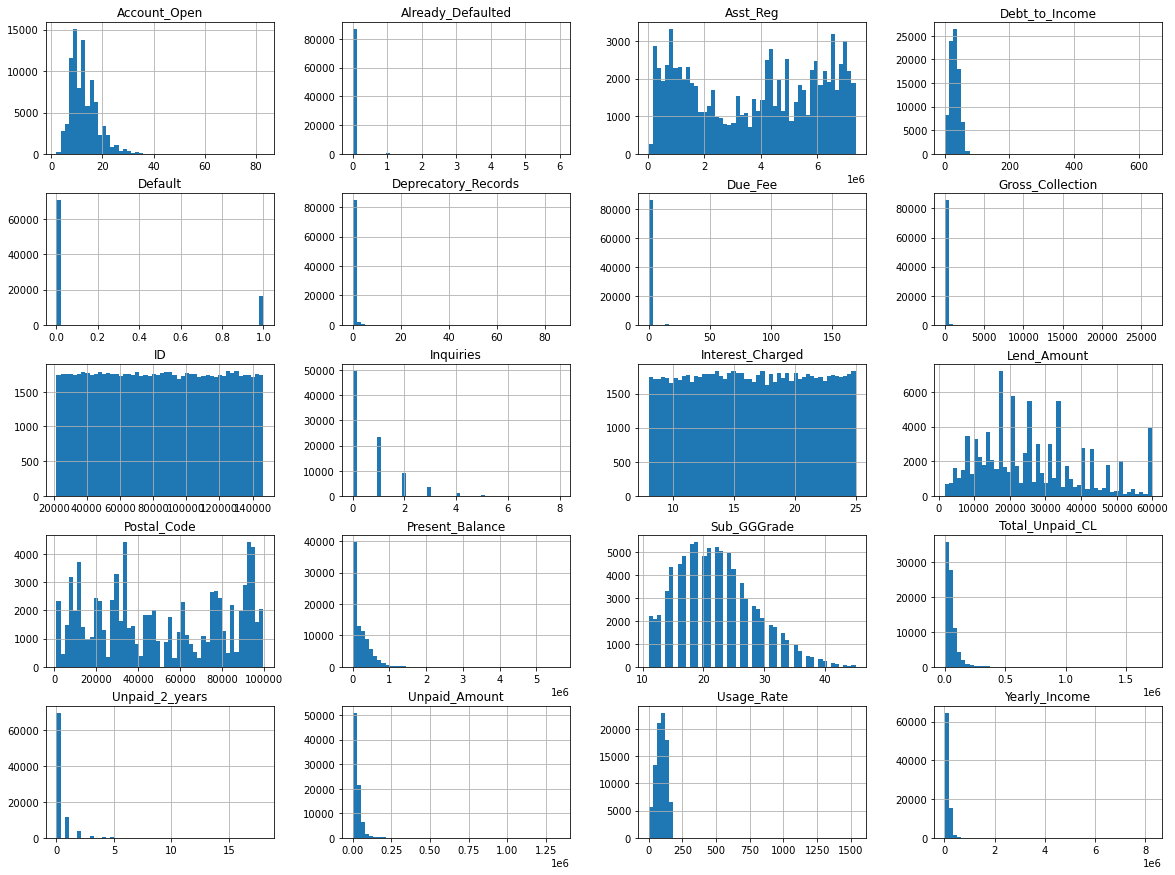

In [44]:
#plots
df.hist(bins=50,figsize=(20,15))
plt.show()
#boxplot???

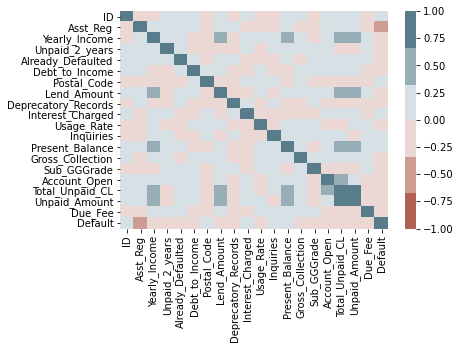

In [45]:
c=df.corr()
sns.heatmap(c,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,50))

In [46]:
#train_set, test_set = train_test_split(df,test_size=0.2,random_state=1)
#ver como fazer para manter a % de defaults entre train e test!

In [11]:
#pipeline
class NewAttributes(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        test=X[:,2]/X[:,3]

In [132]:
#Análise das features
df['Experience'].value_counts()

10    27298
1     11526
2      7133
3      6474
5      4997
4      4693
7      4233
8      4080
6      3758
9      3184
Name: Experience, dtype: int64

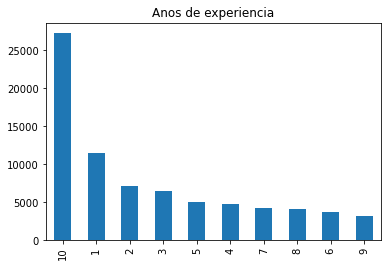

In [18]:
#adicionar dataframe com o valor de values_count das variavei ordinais
#Identificar os o número de pessoas por idade de experiencian
degree_experience_counts=df['Experience'].value_counts()
degree_experience_counts
degree_experience_counts.plot(kind='bar');
plt.title('Anos de experiencia');
#adicionar verificação nas colunas de datatype object se não é para ser númerico

In [133]:

#adicionar dataframe com dados ordinais e categoricos com countable
#DATA FRAME COM VARIÁVEIS CONTINUAS
df.columns
countable=df[['Home_Status','File_Status','State','Reason','Claim_Type']]
countable


,Home_Status,File_Status,State,Reason,Claim_Type
0,MORTGAGE,fully paid,California,debt consolidation,I
1,RENT,whole,NC,debt consolidation,I
2,RENT,whole,Florida,major purchase,I
3,RENT,fully paid,NewJersey,major purchase,I
4,RENT,fully paid,LA,debt consolidation,I
...,...,...,...,...,...
87494,RENT,fully paid,Newyork,small business,I
87495,RENT,whole,MI,debt consolidation,I
87496,RENT,whole,MA,debt consolidation,I
87497,MORTGAGE,fully paid,CT,debt consolidation,I


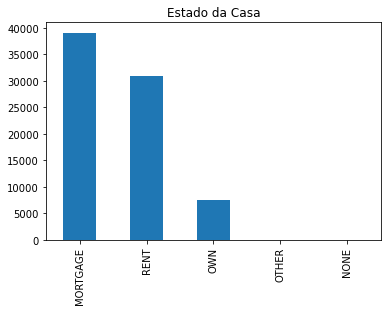

In [134]:
#
home_counts=df['Home_Status'].value_counts()
home_counts.plot(kind='bar');
plt.title('Estado da Casa');


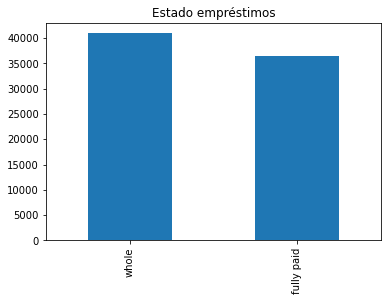

In [135]:
#Emprestimos pagos e não pagas
file_counts=df['File_Status'].value_counts()
file_counts.plot(kind='bar');
plt.title('Estado empréstimos');

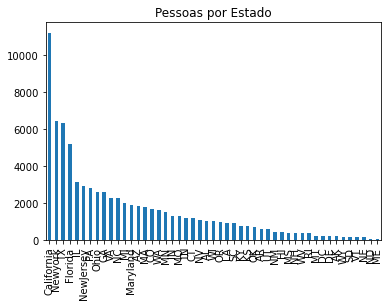

In [136]:
#Pessoas por Estado
state_counts=df['State'].value_counts()
state_counts.plot(kind='bar');
plt.title('Pessoas por Estado');

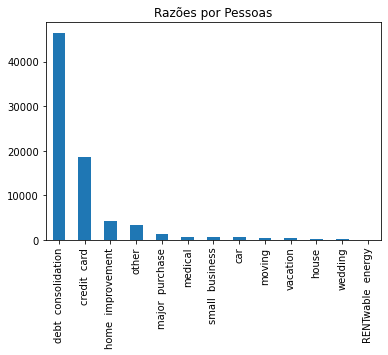

In [137]:
#Razões por Pessoas
reason_counts=df['Reason'].value_counts()
reason_counts.plot(kind='bar');
plt.title('Razões por Pessoas');

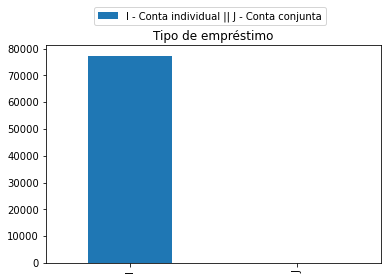

In [138]:
#Tipo de empréstimo
claim_counts=df['Claim_Type'].value_counts()
claim_counts.plot(kind='bar', label='Model length');
plt.legend(['I - Conta individual || J - Conta conjunta'],bbox_to_anchor =(0.85, 1.20))
plt.title('Tipo de empréstimo');

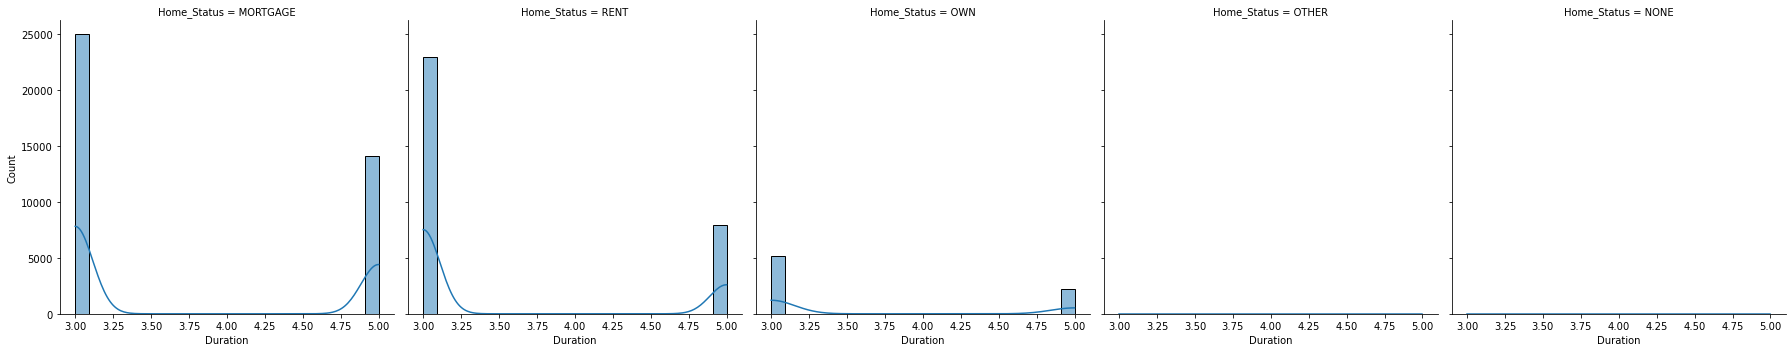

In [139]:
sns.displot(data=df,x="Duration",col="Home_Status",kde=True)

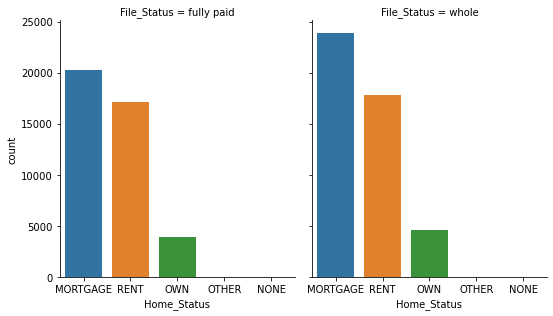

In [112]:

g = sns.catplot(x="Home_Status", col="File_Status", col_wrap=8, 
                data=countable, 
                kind="count", height=4.5, aspect=.8)

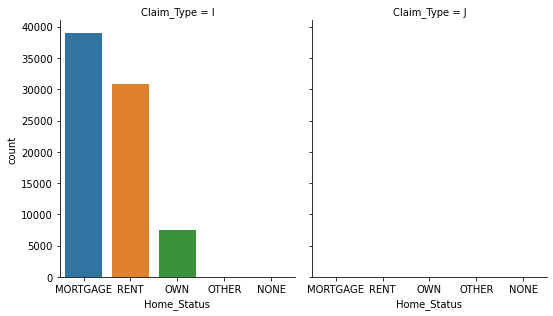

In [141]:

g = sns.catplot(x="Home_Status", col="Claim_Type", col_wrap=8, 
                data=countable, 
                kind="count", height=4.5, aspect=.8)